## MIR: regridding HEALPix GRIB fieldlist

#### Regridding

In [1]:
from earthkit.regrid import regrid
import earthkit.data as ekd

# Get HEALPix nested GRIB data containing two fields.
ds = ekd.from_source("sample", "H8_nested_t2.grib2")

# the target grid is a global 5x5 degree regular latitude-longitude grid
out_grid = {"grid": [5,5]}

# perform interpolation for each field and add results 
# to a new fieldlist stored in memory
r = regrid(ds, out_grid=out_grid, interpolation="linear")

Config: {"finite-element-matrix-reorder-cols":"healpix-ring-to-nested"}
Config: {"finite-element-matrix-reorder-cols":"healpix-ring-to-nested"}


#### Plotting the results

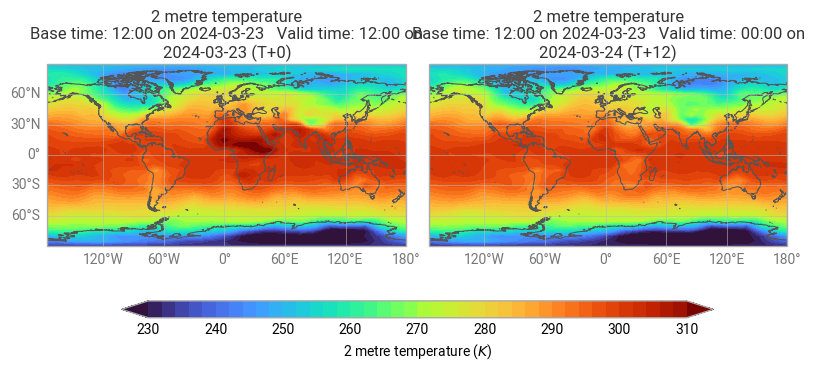

In [2]:
import earthkit.plots as ekp

ekp.quickplot(r).show()

#### Converting the results to xarray

In [3]:
r.to_xarray()

<xarray.Dataset> Size: 44kB
Dimensions:    (step: 2, latitude: 37, longitude: 72)
Coordinates:
  * step       (step) timedelta64[ns] 16B 00:00:00 12:00:00
  * latitude   (latitude) float64 296B 90.0 85.0 80.0 75.0 ... -80.0 -85.0 -90.0
  * longitude  (longitude) float64 576B 0.0 5.0 10.0 15.0 ... 345.0 350.0 355.0
Data variables:
    2t         (step, latitude, longitude) float64 43kB ...
Attributes:
    param:        2t
    paramId:      167
    class:        od
    stream:       oper
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20240323
    time:         1200
    domain:       g
    Conventions:  CF-1.8
    institution:  ECMWF

#### Writing the results to disk

Write the resulting fieldlist to disk:

In [4]:
out_file = "_res_H8_nested_to_5x5.grib"
r.to_target("file", out_file)